In [4]:
import cv2
import numpy as np

img = cv2.imread('data/A/img.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define both red ranges
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Create two masks and combine them
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask = cv2.bitwise_or(mask1, mask2)


# Apply mask to original image
result = cv2.bitwise_and(img, img, mask=mask)

# cv2.imshow('Original', img)
# cv2.imshow('Red Mask', mask)
# cv2.imshow('Red Only', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [8]:
import cv2
import numpy as np

# Load image
img =  cv2.imread('output/input/frame_0000.png')
rows, cols, ch = img.shape


In [9]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_equalized = cv2.equalizeHist(img_gray)

In [10]:
import matplotlib.pyplot as plt

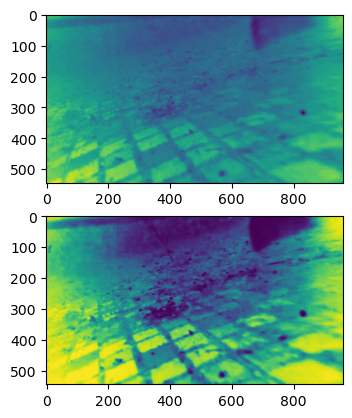

In [11]:
plt.subplot(2, 1, 1)
plt.imshow(img_gray)
plt.subplot(2, 1, 2)
plt.imshow(img_equalized)

In [12]:
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

# Equalize only the Y (luminance) channel
ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])

# Convert back to BGR
equalized_img = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)



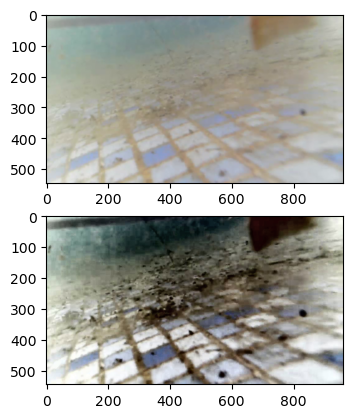

In [13]:
ycrcb = cv2.cvtColor(equalized_img, cv2.COLOR_BGR2YCrCb)

# Apply CLAHE on the Y channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
ycrcb[:, :, 0] = clahe.apply(ycrcb[:, :, 0])

# Convert back to BGR
clahe_img = cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

# Show results
plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB))
# cv2.imshow('Original', img)
# cv2.imshow('CLAHE Enhanced', clahe_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

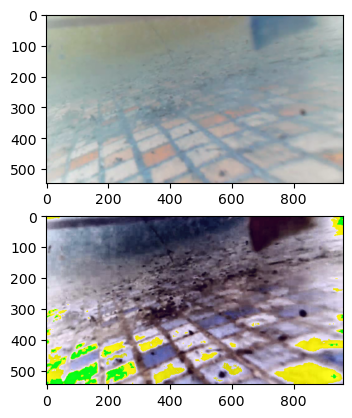

In [14]:
clahe_img[:, :, 2] +=10
clahe_img[:, :, 0] +=30
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(clahe_img, cv2.COLOR_BGR2RGB))

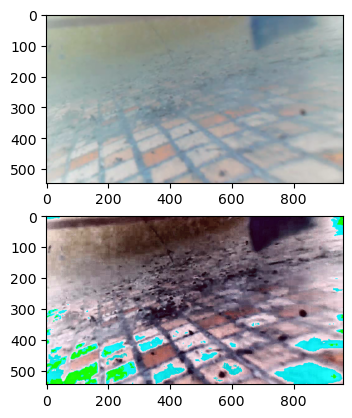

In [15]:
kernel = np.array([[ 0, -1,  0], [-1,  5, -1], [ 0, -1,  0]])
sharpened = cv2.filter2D(clahe_img, -1, kernel)

plt.subplot(2, 1, 1)
plt.imshow(img)
plt.subplot(2, 1, 2)
plt.imshow(sharpened)